In [13]:
# tree time
# https://github.com/baymlab/2023_QuinonesOlvera-Owen/blob/main/figures/Fig2/large_tree/large_tree.ipynb

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 cmalign -o D5D6_alignment.out --mxsize 12000 /n/eddy_lab/users/lmerk/models/g2_introns/RF00029.cm /n/eddy_lab/users/lmerk/phage_groupII/data/genomes/groupII_millard/millard_hit_genomes.fna

In [35]:
from Bio import AlignIO

# Input and output file paths
input_file = "D5D6_alignment.out"
output_file = "D5D6_alignment.nex"

AlignIO.convert(input_file, "stockholm", output_file, "nexus", molecule_type="RNA")

1

In [34]:
from Bio import AlignIO

# Input and output file paths
input_file = "./only1_LPJ/D5D6_alignment.out"
output_file = "./only1_LPJ/D5D6_alignment.nex"

AlignIO.convert(input_file, "stockholm", output_file, "nexus", molecule_type="RNA")

1

In [36]:
# Input and output file paths
input_file = "test_D5.sto"
output_file = "test_D5.nex"

AlignIO.convert(input_file, "stockholm", output_file, "nexus", molecule_type="RNA")

1

______

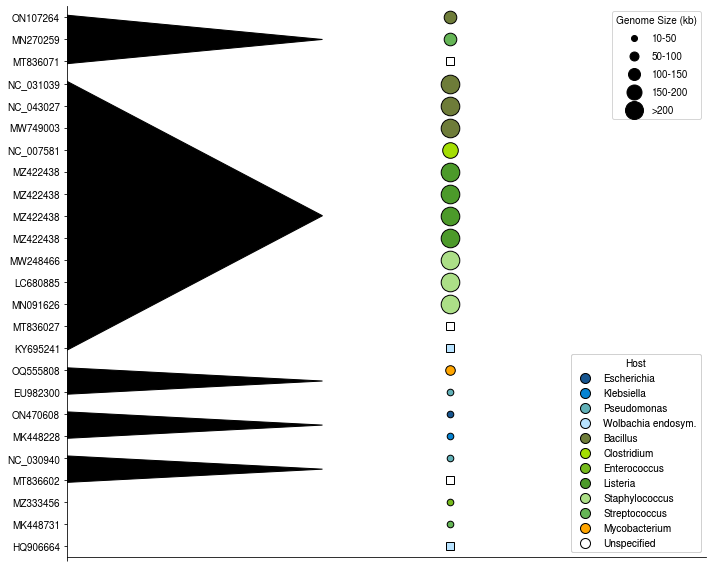

In [34]:
import matplotlib.pyplot as plt

# Define the data
target_names = [
    "ON107264", "MN270259", "MT836071", "NC_031039", "NC_043027", "MW749003",
    "NC_007581", "MZ422438", "MZ422438", "MZ422438", "MZ422438", "MW248466",
    "LC680885", "MN091626", "MT836027", "KY695241", "OQ555808", "EU982300",
    "ON470608", "MK448228", "NC_030940", "MT836602", "MZ333456", "MK448731",
    "HQ906664"
]
clusters = [
    1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 0
]
genome_lengths = [
    133818, 106491, 0, 251042, 252197, 252262, 185683, 223580, 223580, 223580,
    223580, 266637, 267055, 268748, 0, 0, 62663, 22689, 46651, 46342, 32637,
    0, 39221, 35793, 0
]
hosts = [
    "Bacillus", "Streptococcus", "Unspecified", "Bacillus", "Bacillus", "Bacillus",
    "Clostridium", "Listeria", "Listeria", "Listeria", "Listeria", "Staphylococcus",
    "Staphylococcus", "Staphylococcus", "Unspecified", "Wolbachia endosym.", "Mycobacterium",
    "Pseudomonas", "Escherichia", "Klebsiella", "Pseudomonas", "Unspecified",
    "Enterococcus", "Streptococcus", "Wolbachia endosym."
]

# Define colors for each unique host
color_map = {
    "Escherichia": "#17558F",
    "Klebsiella": "#0583D2",
    "Pseudomonas": "#61B0B7",
    "Wolbachia endosym.": "#B8E3FF",
    
    "Bacillus": "#6E7C39",
    "Clostridium": "#A4DE03",
    "Enterococcus": "#76BA1C",
    "Listeria": "#4C9A2A",
    "Staphylococcus": "#ACDF87",
    "Streptococcus": "#65B556",
    
    "Mycobacterium": "orange",

    "Unspecified": "white",
}

# Count the number of clusters
num_clusters = len(set(clusters)) - 1  # Exclude the "-" cluster

# Calculate the maximum genome length (excluding zeros)
max_genome_length = max(length for length in genome_lengths if length != 0) if any(length != 0 for length in genome_lengths) else 1

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate through each cluster in reverse order to plot the 1 cluster first
for i in range(num_clusters, 0, -1):
    # Find the indices of targets in the current cluster
    indices = [j for j, cluster in enumerate(clusters) if cluster == i]

    # Plot a triangle for the current cluster
    if i != "-":
        cluster_start = len(target_names) - max(indices) - 0.1  # Adjusted to shift the triangles down
        cluster_end = len(target_names) - min(indices) + 0.1   # Adjusted to shift the triangles down
        cluster_center = (cluster_start + cluster_end) / 2
        ax.fill([0, 0.2, 0], [cluster_start-1, cluster_center-1, cluster_end-1], color='black')

# Define the size ranges and corresponding legend labels
size_ranges = [(10000, 50000), (50000, 100000), (100000, 150000), (150000, 200000), (200000, float('inf'))]
legend_labels = ['10-50', '50-100', '100-150', '150-200', '>200']

# Plot circles and squares with colors based on host
for i, (length, host) in enumerate(zip(genome_lengths, hosts)):
    if length == 0:
        # Plot square for dashes
        ax.plot(0.3, len(target_names) - i - 1, marker='s', markersize=8, color=color_map[host], markeredgecolor='black')
    else:
        # Plot circle with sizes based on genome size ranges
        for idx, size_range in enumerate(size_ranges):
            if size_range[0] <= length < size_range[1]:
                # Calculate the circle radius based on the index of the size range
                radius = idx + 2 +0.2
                ax.plot(0.3, len(target_names) - i - 1, marker='o', markersize=radius*3, color=color_map[host], markeredgecolor='black')
                break  # Exit loop once the size range is found

# Create legend for the size of circles and genome size ranges
legend1 = ax.legend(handles=[
    plt.Line2D([0], [0], marker='o', markersize=(idx + 2) * 3, color='black', linestyle='None', markeredgewidth=1, markeredgecolor='black') 
    for idx, _ in enumerate(size_ranges)],
    labels=legend_labels, title='Genome Size (kb)', loc='upper right', labelspacing=0.8)

ax.add_artist(legend1)

# Set x-axis tick positions and labels
ax.set_xticks([0])
ax.set_xticklabels([''])
ax.set_xlim(0, 0.5)  # Adjusted for circles and squares

# Set y-axis limits and labels
ax.set_ylim(-0.5, len(target_names) - 0.5)
# Reverse the order of target names
ax.set_yticks(range(len(target_names)))
ax.set_yticklabels(target_names[::-1])

# Create legend for host color information
legend2 = ax.legend(handles=[plt.Line2D([0], [0], marker='o', markersize=10, color=color, markeredgecolor='black', linestyle='None') for host, color in color_map.items()],
                    labels=list(color_map.keys()), title='Host', loc='lower right')
ax.add_artist(legend2)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Nimbus Sans"]

plt.tight_layout()


plt.savefig("clusters_plot1.svg", format="svg", dpi=600)



# Show plot
plt.show()



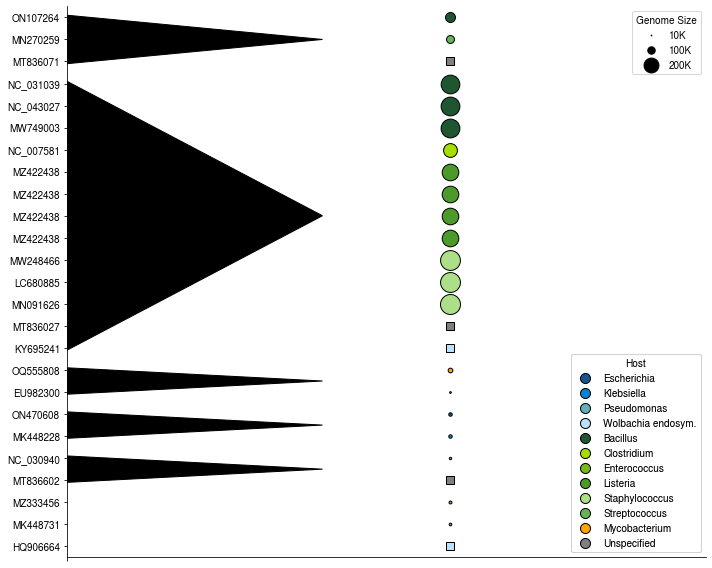

In [5]:
import matplotlib.pyplot as plt

# Define the data
target_names = [
    "ON107264", "MN270259", "MT836071", "NC_031039", "NC_043027", "MW749003",
    "NC_007581", "MZ422438", "MZ422438", "MZ422438", "MZ422438", "MW248466",
    "LC680885", "MN091626", "MT836027", "KY695241", "OQ555808", "EU982300",
    "ON470608", "MK448228", "NC_030940", "MT836602", "MZ333456", "MK448731",
    "HQ906664"
]
clusters = [
    1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 0
]
genome_lengths = [
    133818, 106491, 0, 251042, 252197, 252262, 185683, 223580, 223580, 223580,
    223580, 266637, 267055, 268748, 0, 0, 62663, 22689, 46651, 46342, 32637,
    0, 39221, 35793, 0
]
hosts = [
    "Bacillus", "Streptococcus", "Unspecified", "Bacillus", "Bacillus", "Bacillus",
    "Clostridium", "Listeria", "Listeria", "Listeria", "Listeria", "Staphylococcus",
    "Staphylococcus", "Staphylococcus", "Unspecified", "Wolbachia endosym.", "Mycobacterium",
    "Pseudomonas", "Escherichia", "Klebsiella", "Pseudomonas", "Unspecified",
    "Enterococcus", "Streptococcus", "Wolbachia endosym."
]

# Define colors for each unique host
color_map = {
    "Escherichia": "#17558F",
    "Klebsiella": "#0583D2",
    "Pseudomonas": "#61B0B7",
    "Wolbachia endosym.": "#B8E3FF",
    
    "Bacillus": "#1E5631",
    "Clostridium": "#A4DE03",
    "Enterococcus": "#76BA1C",
    "Listeria": "#4C9A2A",
    "Staphylococcus": "#ACDF87",
    "Streptococcus": "#65B556",
    
    "Mycobacterium": "orange",

    "Unspecified": "gray",
}

# Count the number of clusters
num_clusters = len(set(clusters)) - 1  # Exclude the "-" cluster

# Calculate the maximum genome length (excluding zeros)
max_genome_length = max(length for length in genome_lengths if length != 0) if any(length != 0 for length in genome_lengths) else 1

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate through each cluster in reverse order to plot the 1 cluster first
for i in range(num_clusters, 0, -1):
    # Find the indices of targets in the current cluster
    indices = [j for j, cluster in enumerate(clusters) if cluster == i]

    # Plot a triangle for the current cluster
    if i != "-":
        cluster_start = len(target_names) - max(indices) - 0.1  # Adjusted to shift the triangles down
        cluster_end = len(target_names) - min(indices) + 0.1   # Adjusted to shift the triangles down
        cluster_center = (cluster_start + cluster_end) / 2
        ax.fill([0, 0.2, 0], [cluster_start-1, cluster_center-1, cluster_end-1], color='black')

# Plot circles and squares with colors based on host
for i, (length, host) in enumerate(zip(genome_lengths, hosts)):
    if length == 0:
        # Plot square for dashes
        ax.plot(0.3, len(target_names) - i - 1, marker='s', markersize=8, color=color_map[host], markeredgecolor='black')
    else:
        # Plot circle proportional to genome length
        size = 0 + (length / max(genome_lengths)) * 0.1
        ax.plot(0.3, len(target_names) - i - 1, marker='o', markersize=size*200, color=color_map[host], markeredgecolor='black')

# Set x-axis tick positions and labels
ax.set_xticks([0])
ax.set_xticklabels([''])
ax.set_xlim(0, 0.5)  # Adjusted for circles and squares

# Set y-axis limits and labels
ax.set_ylim(-0.5, len(target_names) - 0.5)
# Reverse the order of target names
ax.set_yticks(range(len(target_names)))
ax.set_yticklabels(target_names[::-1])


# Create legend for the size of circles and genome size
sizes = [10000, 100000, 200000]
legend1 = ax.legend(handles=[plt.Line2D([0], [0], marker='o', markersize=(size / max(genome_lengths))*200*0.1, color='black', linestyle='None') for size in sizes],
                    labels=['10K', '100K', '200K'], title='Genome Size', loc='upper right')
ax.add_artist(legend1)

# Create legend for host color information
legend2 = ax.legend(handles=[plt.Line2D([0], [0], marker='o', markersize=10, color=color, markeredgecolor='black', linestyle='None') for host, color in color_map.items()],
                    labels=list(color_map.keys()), title='Host', loc='lower right')
ax.add_artist(legend2)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Nimbus Sans"]

plt.tight_layout()


plt.savefig("clusters_plot1.svg", format="svg", dpi=600)



# Show plot
plt.show()



<Figure size 432x288 with 0 Axes>

______

In [14]:
clustal_cmd = f'clustalo -i data/fastas/RVT.fa -o  data/fastas/RVT.msa.fasta --outfmt=fa'

print(clustal_cmd)

clustalo -i data/fastas/RVT.fa -o  data/fastas/RVT.msa.fasta --outfmt=fa


In [15]:
# but does this even work?? everything is permuted and everything so idk

In [16]:
iqtree_cmd = f'iqtree -st DNA -nt AUTO -m MFP -bb 1000 -alrt 1000 -s data/fastas/RVT.msa.fasta'

print(iqtree_cmd)

iqtree -st DNA -nt AUTO -m MFP -bb 1000 -alrt 1000 -s data/fastas/RVT.msa.fasta


In [17]:
# these run in defensefinder, then I ran the commands in defensefinder

In [19]:
esl_cmd = f'esl-alipid data/fastas/RVT.msa.fasta > data/fastas/RVT_pid.tbl'
!{esl_cmd}

In [22]:
alphatv_pid = 'data/fastas/RVT_pid.tbl'

df1 = pd.read_csv(alphatv_pid, delim_whitespace=True, comment='#', header=None)
df1.columns = ['seq1', 'seq2', 'p_id', 'nid', 'denomid', 'p_match', 'n_match', 'denommatch']
df1 = df1.sort_values('p_id', ascending=False)

In [24]:
# fill other values to make symetrical matrix
df2 = df1.rename(columns={'seq1': 'a', 'seq2': 'b'})
df2 = df2.rename(columns={'a': 'seq2', 'b': 'seq1'})

df_sym = pd.concat([df1, df2])

In [26]:
df_sym.sort_values('p_id')
m = df_sym.pivot_table(index='seq1', columns='seq2', values='p_id', fill_value=100)


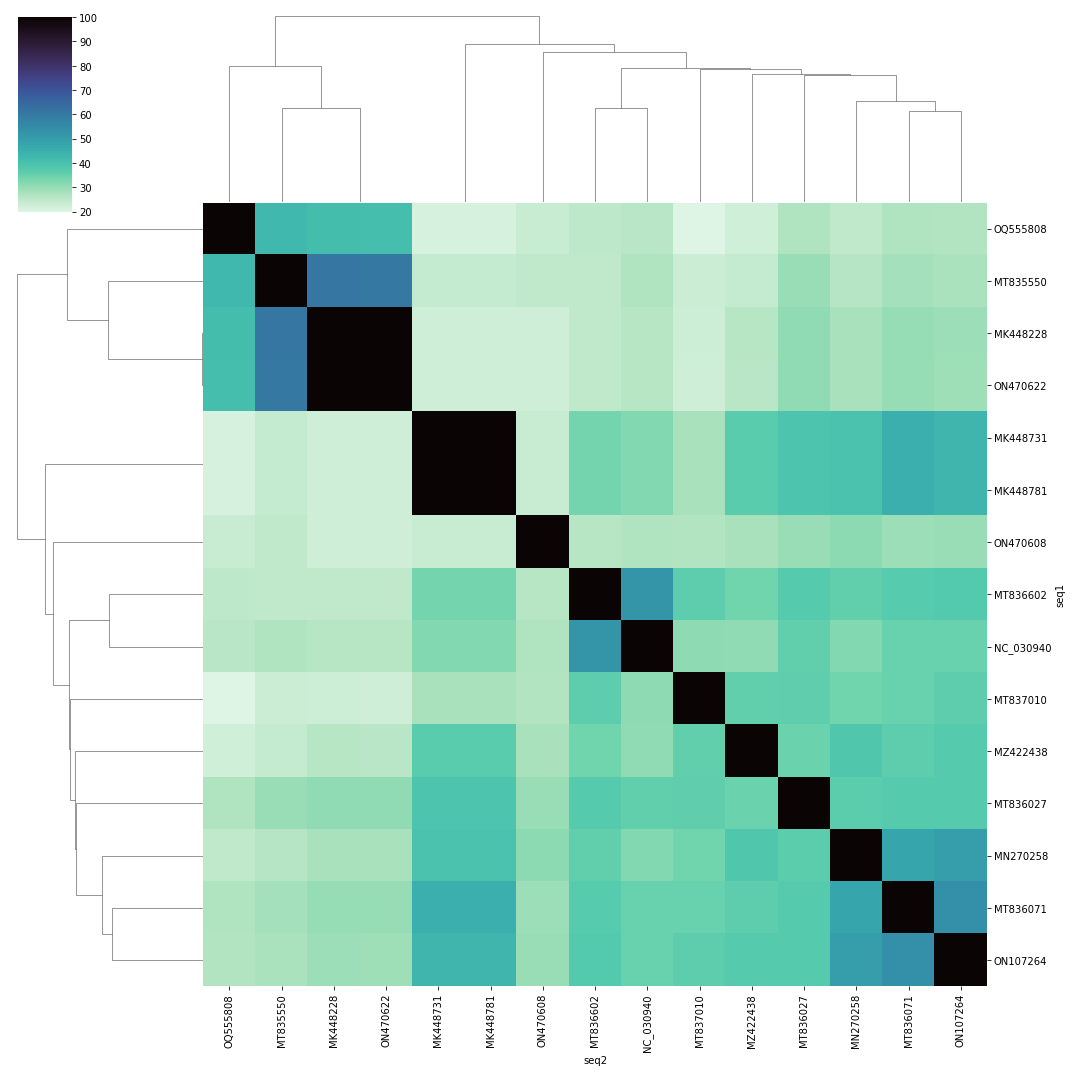

In [28]:
g = sns.clustermap(m, cmap="mako_r", figsize=(15, 15))


In [31]:
g.savefig('data/fastas/pid.png')

In [32]:
g